# Mini Assignment 9

##Author: Johnson Yun

##Date: 28th of Oct (edited on 3st of Nov & 15th of Nov)
In this week, our team is going to observe the cases in different countries. And I will discuss the disease in Russia. This file will be merging two sources of data from 'Our world data' and 'John Hopkins data', this is because we would like to conduct EDA and create visualisations using the number of recovered cases which is only available in John Hopkin's data set.

In order to show some findings about COVID in Russia, the following graphs will be presented using plotly:
1. New cases each day
2. New deaths each day
3. New recovery each day
4. New Testing each day

Followed by calculating the Case Fatality Rate (CFR) and plot the death rate for each day on a time series plot for visualisation. CFR is calculated using this formula:

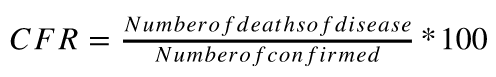

After finishing the calculation of CFR, then I'll calculate the Infection Fatality Rate (IFR) and find the confidence interval for this rate and see if there is any obvious variance between these two ratios. IFR is calculated using this formula:

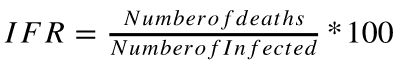

In [60]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime
from datetime import *
import plotly.io as pio
pio.renderers.default = "png"
from google.colab import files
import io

In [61]:
#@title
!pip install plotly==4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
import plotly.graph_objects as go

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.7).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


First, I'll read in 'Our World Data' as df and read in recovery data from John Hopkins as jh_recovered.

In [62]:
df=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
jh_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


Then, change the date values into date format and for preparation of merging the two data sets the data is formatted into %m/%d/%y. Repeat this for both data sets.

In [63]:
df['date']=pd.to_datetime(df['date'], errors='ignore')
df["date"]= df["date"].dt.strftime("%m/%d/%y")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,12/31/19,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,01/02/20,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,01/03/20,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,01/04/20,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


For the John Hopkin's data set we need to transform the dataframe from wide to long format using the melt function so that the dataframe is consistent.

In [64]:
jh_recovered2=jh_recovered.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name = 'date', value_name = 'recovered')
jh_recovered2['date']=pd.to_datetime(jh_recovered2['date'], errors='ignore')
jh_recovered2["date"]= jh_recovered2["date"].dt.strftime("%m/%d/%y")
jh_recovered2['Country/Region'] = jh_recovered2['Country/Region'].replace(['US'],'United States')
jh_recovered2.head()

,Province/State,Country/Region,Lat,Long,date,recovered
0,NaN,Afghanistan,33.93911,67.709953,01/22/20,0
1,NaN,Albania,41.15330,20.168300,01/22/20,0
2,NaN,Algeria,28.03390,1.659600,01/22/20,0
3,NaN,Andorra,42.50630,1.521800,01/22/20,0
4,NaN,Angola,-11.20270,17.873900,01/22/20,0


Merge the two data sets based on the 'location' & 'date' variables in the 'Our World data' and 'Country/Region' & 'date' variables in the John Hopkins data. Filter the country I was assigned, which is Russia.

In [65]:
merge1=df.merge(jh_recovered2, how='inner', left_on=["location", "date"], right_on=["Country/Region","date"])
merge2 = merge1[merge1['location'] == 'Russia']
merge2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Province/State,Country/Region,Lat,Long,recovered
51101,RUS,Europe,Russia,01/22/20,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816,NaN,Russia,61.52401,105.318756,0
51102,RUS,Europe,Russia,01/23/20,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816,NaN,Russia,61.52401,105.318756,0
51103,RUS,Europe,Russia,01/24/20,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816,NaN,Russia,61.52401,105.318756,0
51104,RUS,Europe,Russia,01/25/20,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816,NaN,Russia,61.52401,105.318756,0
51105,RUS,Europe,Russia,01/26/20,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816,NaN,Russia,61.52401,105.318756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51396,RUS,Europe,Russia,11/12/20,1836960.0,19851.0,20500.857,31593.0,432.0,339.429,12587.568,136.027,140.480,216.488,2.960,2.326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67347351.0,636888.0,461.490,4.364,543722.0,3.726,26.522,0.038,tests performed,NaN,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816,NaN,Russia,61.52401,105.318756,1378463
51397,RUS,Europe,Russia,11/13/20,1858568.0,21608.0,20815.714,32032.0,439.0,360.429,12735.635,148.066,142.637,219.496,3.008,2.470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67949154.0,601803.0,465.614,4.124,550999.0,3.776,26.470,0.038,tests performed,NaN,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816,NaN,Russia,61.52401,105.318756,1396851
51398,RUS,Europe,Russia,11/14/20,1880551.0,21983.0,21015.857,32443.0,411.0,365.143,12886.271,150.636,144.009,222.312,2.816,2.502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68577003.0,627849.0,469.916,4.302,556356.0,3.812,26.473,0.038,tests performed,NaN,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816,NaN,Russia,61.52401,105.318756,1415213
51399,RUS,Europe,Russia,11/15/20,1903253.0,22702.0,21345.286,32834.0,391.0,369.000,13041.834,155.563,146.266,224.991,2.679,2.529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69111898.0,534895

Change the date values into date format.

In [66]:
merge2['date']=pd.to_datetime(merge2['date'], errors='ignore')
merge2['date'].dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dtype('<M8[ns]')

Plot the new confirmed cases each day in Russia.

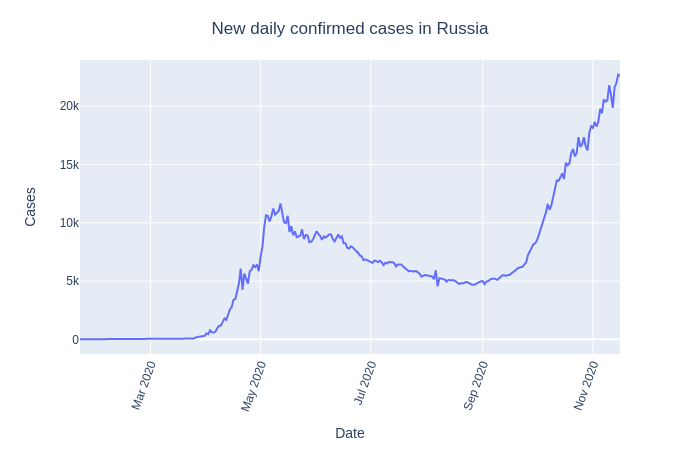

In [67]:
fig=px.line(merge2,x="date",
        y="new_cases")
fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Cases")
fig.update_layout(
    title={
        'text': "New daily confirmed cases in Russia",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")


Plot the new deaths each day in Russia.

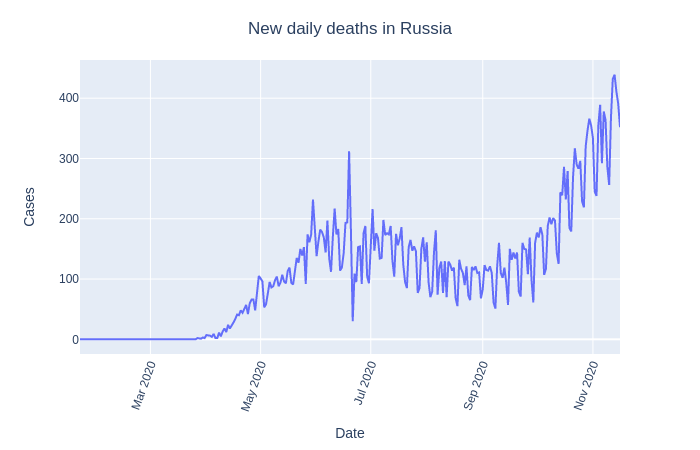

In [68]:
fig=px.line(merge2,x="date",
        y="new_deaths")
fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Cases")
fig.update_layout(
    title={
        'text': "New daily deaths in Russia",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

Plot the new recovery each day in Russia.

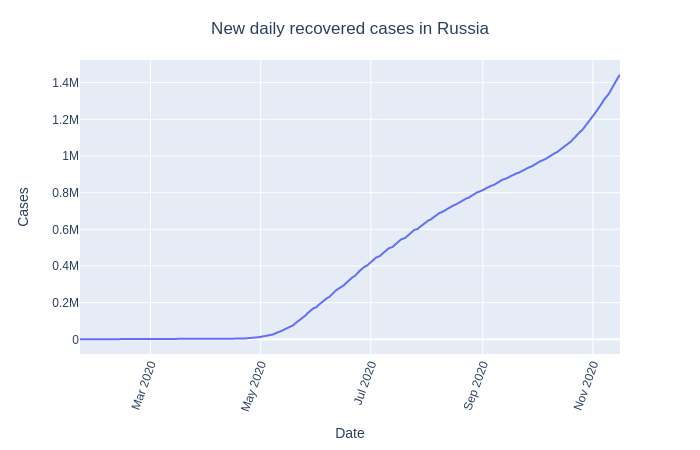

In [69]:
fig=px.line(merge2,x="date",
        y="recovered")
fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Cases")
fig.update_layout(
    title={
        'text': "New daily recovered cases in Russia",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

Plot the new tests each day in Russia.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



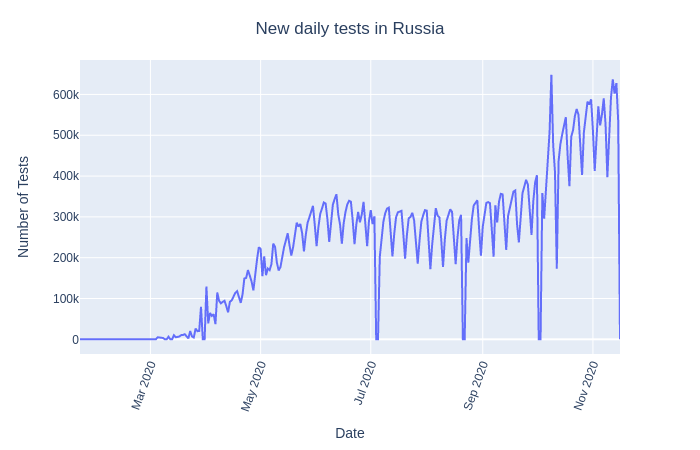

In [70]:
merge2["new_tests"].fillna(value=0, inplace=True,limit=69)
fig=px.line(merge2,x="date",
        y="new_tests")
fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Number of Tests")
fig.update_layout(
    title={
        'text': "New daily tests in Russia",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

Calculating CFR rate using total deaths/total cases and plot the change of CFR over time.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



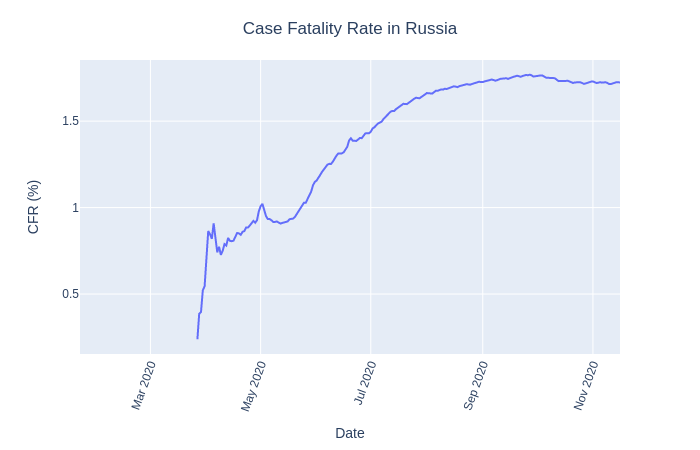

In [71]:
merge2["CFR%"]=(merge2["total_deaths"]/merge2["total_cases"])*100
fig=px.line(merge2,x="date",
        y="CFR%")
fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="CFR (%)")
fig.update_layout(
    title={
        'text': "Case Fatality Rate in Russia",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

In [72]:
a = merge2.total_deaths.iloc[-1]
b = merge2.total_cases.iloc[-1]
percentage = "{:.8%}".format(a/b)
print(percentage)

1.72320953%


In the next stage, I will first grab some data I need for each country in order to compare the nature of population in each country, for example, number of old people, proportion of male and female smokers, their median age, the number of population and so on. The reson of doing that is to find if there is some potential relationship between these factors and number of deaths in COVID-19.

Here is data needed for russia

In [73]:
population_russia = merge2.population.mean()
median_age_russia = merge2.median_age.mean()
age_65_russia = merge2.aged_65_older.mean()
age_70_russia = merge2.aged_70_older.mean()
poverty_russia = merge2.extreme_poverty.mean()
female_smoker_russia = merge2.female_smokers.mean()
male_smoker_russia = merge2.male_smokers.mean()
life_exp_russia = merge2.life_expectancy.mean()
human_development_index_russia = merge2.human_development_index.mean()


Data needed for India

In [74]:
merge3 = merge1[merge1['location'] == "India"]
merge3
population_india = merge3.population.mean()
median_age_india = merge3.median_age.mean()
age_65_india = merge3.aged_65_older.mean()
age_70_india = merge3.aged_70_older.mean()
poverty_india = merge3.extreme_poverty.mean()
female_smoker_india = merge3.female_smokers.mean()
male_smoker_india = merge3.male_smokers.mean()
life_exp_india = merge3.life_expectancy.mean()
human_development_index_india = merge3.human_development_index.mean()



Data needed for USA

In [75]:
merge4 = merge1[merge1['location'] == "United States"]
merge4
population_usa = merge4.population.mean()
median_age_usa = merge4.median_age.mean()
age_65_usa = merge4.aged_65_older.mean()
age_70_usa = merge4.aged_70_older.mean()
poverty_usa = merge4.extreme_poverty.mean()
female_smoker_usa = merge4.female_smokers.mean()
male_smoker_usa = merge4.male_smokers.mean()
life_exp_usa = merge4.life_expectancy.mean()
human_development_index_usa = merge4.human_development_index.mean()


Data needed for Brazil

In [76]:
merge5 = merge1[merge1['location'] == "Brazil"]
merge5
population_braz = merge5.population.mean()
median_age_braz = merge5.median_age.mean()
age_65_braz = merge5.aged_65_older.mean()
age_70_braz = merge5.aged_70_older.mean()
poverty_braz = merge5.extreme_poverty.mean()
female_smoker_braz = merge5.female_smokers.mean()
male_smoker_braz = merge5.male_smokers.mean()
life_exp_braz = merge5.life_expectancy.mean()
human_development_index_braz = merge5.human_development_index.mean()


Data needed for Africa

In [77]:
merge6 = merge1[merge1['location'] == "South Africa"]
merge6
population_afr = merge6.population.mean()
median_age_afr = merge6.median_age.mean()
age_65_afr = merge6.aged_65_older.mean()
age_70_afr = merge6.aged_70_older.mean()
poverty_afr = merge6.extreme_poverty.mean()
female_smoker_afr = merge6.female_smokers.mean()
male_smoker_afr = merge6.male_smokers.mean()
life_exp_afr = merge6.life_expectancy.mean()
human_development_index_afr = merge6.human_development_index.mean()


After finishing extract some useful data, now I want to use a histogram to first compare the average age among the five countries we picked and then use a bar chart to show the share of the elderly in these countries.

In [78]:
labels = ['Africa', 'Brazil', 'India', 'Russia', 'USA']
pop = [population_afr, population_braz, population_india, population_russia, population_usa]
totalcas = [merge6.total_cases.iloc[-1],merge5.total_cases.iloc[-1],merge3.total_cases.iloc[-1],merge2.total_cases.iloc[-1],merge4.total_cases.iloc[-1]]
totaldeath = [merge6.total_deaths_per_million.iloc[-1], merge5.total_deaths_per_million.iloc[-1], merge3.total_deaths_per_million.iloc[-1], merge2.total_deaths_per_million.iloc[-1], merge4.total_deaths_per_million.iloc[-1]]
poor = [poverty_afr, poverty_braz, poverty_india, poverty_russia, poverty_usa]
age65 = [age_65_afr,age_65_braz,age_65_india,age_65_russia,age_65_usa]
age70 = [age_70_afr,age_70_braz,age_70_india,age_70_russia,age_70_usa]
median_age = [median_age_afr,median_age_braz,median_age_india,median_age_russia,median_age_usa]

pop = [int(i) for i in pop]
poor = [int(i) for i in poor]
totaldeath = [int(i) for i in totaldeath]
age65 = [round(i) for i in age65]
age70 = [round(i) for i in age70]


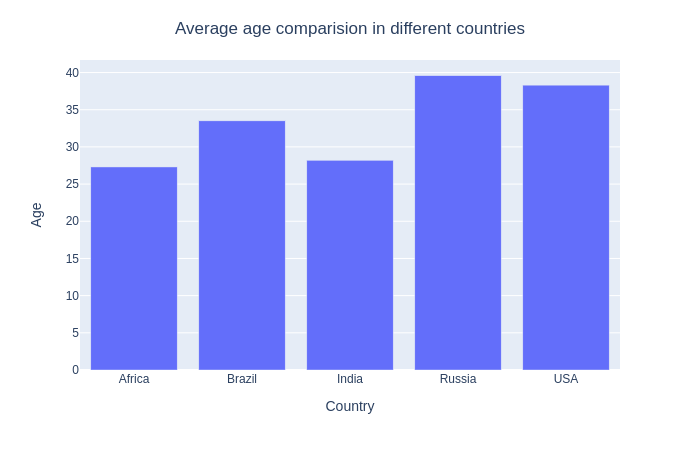

In [79]:
#@title
fig = px.bar(x=labels, y=median_age)
fig.update_xaxes(title_text="Country")
fig.update_yaxes(title_text="Age")
fig.update_layout(
  title={
        'text': "Average age comparision in different countries",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

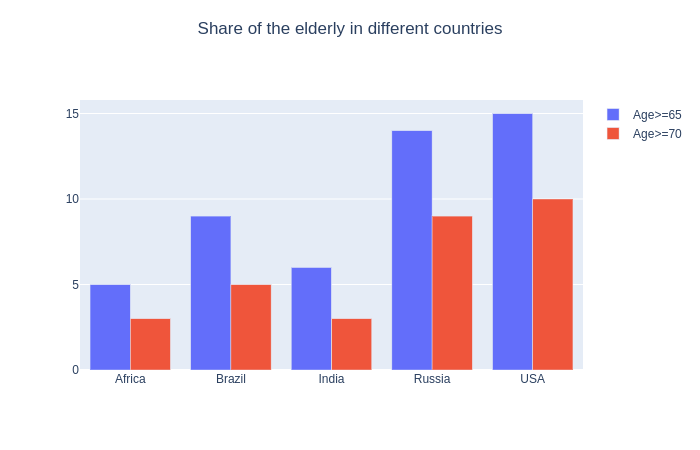

In [80]:
#@title
fig = go.Figure(data=[
    go.Bar(name='Age>=65', x=labels, y=age65),
    go.Bar(name='Age>=70', x=labels, y=age70)
])
fig.update_layout(barmode='group')
fig.update_layout(
  title={
        'text': "Share of the elderly in different countries",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

From the graph above, we can find that the aging people have a considerable proportion in both Russia and USA and these two countries have a higher average age of population as well. Then, I'll compare the proportion of male and female smokers in these countries.

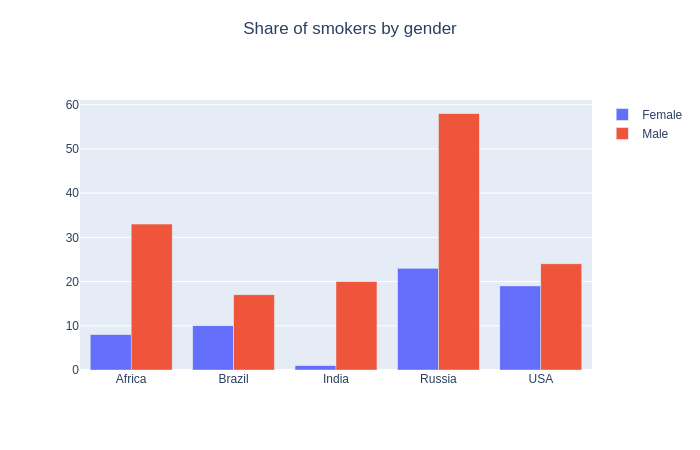

In [81]:
femalesmoker = [female_smoker_afr, female_smoker_braz, female_smoker_india, female_smoker_russia, female_smoker_usa]
malesmoker = [male_smoker_afr,male_smoker_braz,male_smoker_india,male_smoker_russia,male_smoker_usa]
totaldeath = [merge6.total_deaths_per_million.iloc[-1], merge5.total_deaths_per_million.iloc[-1], merge3.total_deaths_per_million.iloc[-1], merge2.total_deaths_per_million.iloc[-1], merge4.total_deaths_per_million.iloc[-1]]

femalesmoker = [int(i) for i in femalesmoker]
malesmoker = [int(i) for i in malesmoker]
totaldeath = [int(i) for i in totaldeath]

fig = go.Figure(data=[
    go.Bar(name='Female', x=labels, y=femalesmoker),
    go.Bar(name='Male', x=labels, y=malesmoker)
])
fig.update_layout(barmode='group')
fig.update_layout(
  title={
        'text': "Share of smokers by gender",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

Also the rate of smokers is quite high in Russia compared to other countries. The next thing to do now calculates a IFR which is just the total deaths/total infected people. This is difficult to do because we have to estimate the number of people infected since the formula is:
a number of people infected=number of confirmed cases (known) +number of unknown cases (unknown). However, the IFR is the most realistic number which can reflect the deadly of a disease. So, we still decide to calculate this rate by choosing the relevant model for estimation of the number of people infected. 


In [82]:
estimate = pd.read_csv("https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Checkpoint%202/Model%20Datasets/daily-new-estimated-infections-of-covid-19.csv?token=AAABDAT4A7FSOKEAWS7WABC7XT636")
estimate.head()

,Entity,Code,Date,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned) Annotations","Daily new estimated infections of COVID-19 (ICL, mean)","Daily new estimated infections of COVID-19 (IHME, mean)","Daily new estimated infections of COVID-19 (YYG, mean)","Daily new estimated infections of COVID-19 (LSHTM, median)"
0,Afghanistan,AFG,2020-01-02,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2020-01-03,0.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2020-01-04,0.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2020-01-05,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2020-01-06,0.0,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



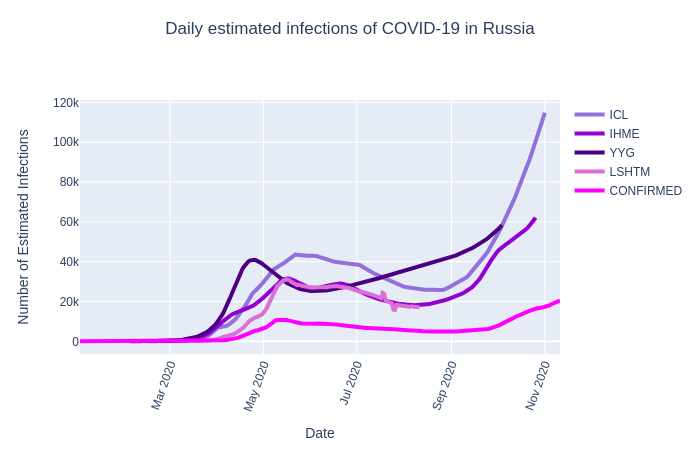

In [83]:
estimate_russ=estimate[estimate["Entity"]=="Russia"]
estimate_russ['Date']=pd.to_datetime(estimate_russ['Date'], errors='ignore')

fig = go.Figure()
fig.add_trace(go.Scatter(x=estimate_russ["Date"], 
                         y=estimate_russ["Daily new estimated infections of COVID-19 (ICL, mean)"],
                         name='ICL',
                         line=dict(color='mediumPurple', width=4)))

fig.add_trace(go.Scatter(x=estimate_russ["Date"], 
                         y=estimate_russ["Daily new estimated infections of COVID-19 (IHME, mean)"],
                         name='IHME',
                         line=dict(color='DarkViolet', width=4)))

fig.add_trace(go.Scatter(x=estimate_russ["Date"], 
                         y=estimate_russ["Daily new estimated infections of COVID-19 (YYG, mean)"],
                         name='YYG',
                         line=dict(color='Indigo', width=4)))

fig.add_trace(go.Scatter(x=estimate_russ["Date"], 
                         y=estimate_russ["Daily new estimated infections of COVID-19 (LSHTM, median)"],
                         name='LSHTM',
                         line=dict(color='orchid', width=4)))

fig.add_trace(go.Scatter(x=estimate_russ["Date"], 
                         y=estimate_russ["Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)"],
                         name='CONFIRMED',
                         line=dict(color='fuchsia', width=4)))

fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Number of Estimated Infections")
fig.update_layout(
    title={
        'text': "Daily estimated infections of COVID-19 in Russia",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show(renderer="png")

The model I chose here is the Imperial College London (ICL) model. The reason I chose this model is that it assumes that some low-and-middle-income countries (LMICs) have higher mortality rates which may improve the accuracy of model estimates. And as I plotted above, Russia has a high proportion of aging people which means it may suit this model and gives a higher accuracy.

In [84]:
data = pd.read_csv("https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Checkpoint%202/Model%20Datasets/daily-new-estimated-covid-19-infections-icl-model.csv?token=AAABDAU743GBZOSOFBV4UIS7XT67K")
data = data[data['Entity'] == 'Russia']
data


,Entity,Code,Date,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned) Annotations","Daily new estimated infections of COVID-19 (ICL, mean)","Daily new estimated infections of COVID-19 (ICL, lower)","Daily new estimated infections of COVID-19 (ICL, upper)"
46127,Russia,RUS,2020-01-02,0.00000,NaN,NaN,NaN,NaN
46128,Russia,RUS,2020-01-03,0.00000,NaN,NaN,NaN,NaN
46129,Russia,RUS,2020-01-04,0.00000,NaN,NaN,NaN,NaN
46130,Russia,RUS,2020-01-05,0.00000,NaN,NaN,NaN,NaN
46131,Russia,RUS,2020-01-06,0.00000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
46437,Russia,RUS,2020-11-07,19066.28571,NaN,NaN,NaN,NaN
46438,Russia,RUS,2020-11-08,19388.57143,NaN,NaN,NaN,NaN
46439,Russia,RUS,2020-11-09,19650.42857,NaN,NaN,NaN,NaN
46440,Russia,RUS,2020-11-10,20156.28571,NaN,NaN,NaN,NaN


I tried to rename the columns which I may use for calculating the IFR ratio.

In [85]:
data['Date']=pd.to_datetime(data['Date'], errors='ignore')
data['Date'].dtypes
data = data.rename(columns={'Daily new estimated infections of COVID-19 (ICL, mean)': 'infection_mean', 'Daily new estimated infections of COVID-19 (ICL, lower)': 'infection_lower', 'Daily new estimated infections of COVID-19 (ICL, upper)': 'infection_upper'})
data

,Entity,Code,Date,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned) Annotations",infection_mean,infection_lower,infection_upper
46127,Russia,RUS,2020-01-02,0.00000,NaN,NaN,NaN,NaN
46128,Russia,RUS,2020-01-03,0.00000,NaN,NaN,NaN,NaN
46129,Russia,RUS,2020-01-04,0.00000,NaN,NaN,NaN,NaN
46130,Russia,RUS,2020-01-05,0.00000,NaN,NaN,NaN,NaN
46131,Russia,RUS,2020-01-06,0.00000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
46437,Russia,RUS,2020-11-07,19066.28571,NaN,NaN,NaN,NaN
46438,Russia,RUS,2020-11-08,19388.57143,NaN,NaN,NaN,NaN
46439,Russia,RUS,2020-11-09,19650.42857,NaN,NaN,NaN,NaN
46440,Russia,RUS,2020-11-10,20156.28571,NaN,NaN,NaN,NaN


Then, I plot the confidence interval for daily new estimated infections of COVID-19, given by the dataset.

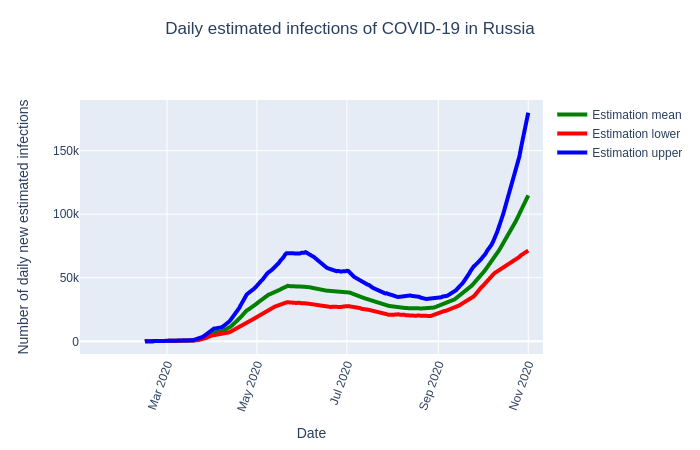

In [86]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=data["Date"], 
                         y=data["infection_mean"],
                         name='Estimation mean',
                         line=dict(color='green', width=4)))

fig.add_trace(go.Scatter(x=data["Date"], 
                         y=data["infection_lower"],
                         name='Estimation lower',
                         line=dict(color='red', width=4)))

fig.add_trace(go.Scatter(x=data["Date"], 
                         y=data["infection_upper"],
                         name='Estimation upper',
                         line=dict(color='blue', width=4)))


fig.update_xaxes(title_text="Date",tickangle = 290)
fig.update_yaxes(title_text="Number of daily new estimated infections ")
fig.update_layout(
    title={
        'text': "Daily estimated infections of COVID-19 in Russia",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(renderer="png")

And finally I get the confidence interval for IFR rate which is calculated by total deaths (same timeline as the estimate infections)/estimated infections for the mean, upper and lower bounds.

In [87]:
ifr_icl=merge2["total_deaths"].max()/data["infection_mean"].sum()
IFR = ifr_icl*100

In [88]:
ifr_icl_upper=merge2["total_deaths"].max()/data["infection_upper"].sum()
ifr_icl_lower=merge2["total_deaths"].max()/data["infection_lower"].sum()
a = abs(ifr_icl_upper-ifr_icl_lower)*100/2

In [89]:
from IPython.display import Markdown as md
md("The IFR for Russia is {}±{} .".format(round(IFR,2),round(a,2)))

The IFR for Russia is 0.39±0.13 .